In [4]:
# Predictiong price for a stock using XGBoot in 1wk time frame


In [ ]:
# import libs
import numpy as np
import pandas as pd
import yfinance as yf
import xgboost as xgb

from datetime import datetime

from sklearn.metrics import mean_squared_error,mean_absolute_error ,mean_absolute_percentage_error

In [8]:
## downloading the dataset

current_date=datetime.now().date()

ticker='NFLX'
df=yf.download(ticker,start='2023-01-01',end=current_date,interval='1wk',auto_adjust=True)

df=df.reset_index()
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,NFLX,NFLX,NFLX,NFLX,NFLX
0,2023-01-01,315.549988,316.769989,288.700012,298.059998,33397300
1,2023-01-08,332.820007,336.649994,311.070007,316.829987,48561600
2,2023-01-15,342.500000,344.000000,313.390015,331.079987,63499600
3,2023-01-22,360.769989,369.019989,340.630005,341.720001,50170600
4,2023-01-29,365.899994,379.429993,348.709991,358.440002,36052500


In [9]:
# Processing the data 

#prepare the target variable
# (here we handel multi index by given both indexes to acces the desired column)
df['target_close']=df[('Close',ticker)].shift(-1)

# Excluding the last row as the target close is NaN
x_train=df.iloc[:-1].copy().drop(columns=['target_close','Date'])
y_train=df['target_close'][:-1]

df

C:\Users\fardi\AppData\Local\Temp\ipykernel_12976\3162783006.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_train=df.iloc[:-1].copy().drop(columns=['target_close','Date'])


Price,Date,Close,High,Low,Open,Volume,target_close
Ticker,,NFLX,NFLX,NFLX,NFLX,NFLX,
0,2023-01-01,315.549988,316.769989,288.700012,298.059998,33397300,332.820007
1,2023-01-08,332.820007,336.649994,311.070007,316.829987,48561600,342.500000
2,2023-01-15,342.500000,344.000000,313.390015,331.079987,63499600,360.769989
3,2023-01-22,360.769989,369.019989,340.630005,341.720001,50170600,365.899994
4,2023-01-29,365.899994,379.429993,348.709991,358.440002,36052500,347.359985
...,...,...,...,...,...,...,...
130,2025-06-29,1297.180054,1341.150024,1271.589966,1331.000000,13331500,1245.109985
131,2025-07-06,1245.109985,1295.000000,1231.300049,1295.000000,16138700,1209.239990
132,2025-07-13,1209.239990,1277.500000,1201.010010,1244.910034,25972900,1180.489990


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

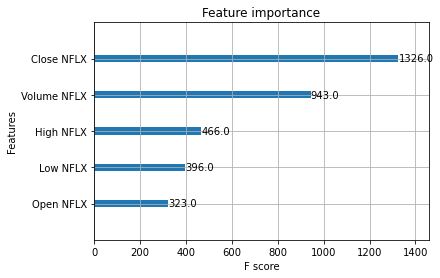

In [10]:
#Feature Engineering
# Training an XGB model

reg=xgb.XGBRegressor(n_estimators=1000,random_state=8)

reg.fit(x_train,y_train)

xgb.plot_importance(reg,max_num_features=100)

In [12]:
# Feature Engineering 

df['ratio close to high']=df[('Close',ticker)]/df[('High',ticker)]
df['ratio close to low']=df[('Close',ticker)]/df[('Low',ticker)]
df['ratio open to high']=df[('Open',ticker)]/df[('High',ticker)]

df.head()

Price,Date,Close,High,Low,Open,Volume,target_close,ratio close to high,ratio close to low,ratio open to high
Ticker,,NFLX,NFLX,NFLX,NFLX,NFLX,,,,
0,2023-01-01,315.549988,316.769989,288.700012,298.059998,33397300,332.820007,0.996149,1.093003,0.940935
1,2023-01-08,332.820007,336.649994,311.070007,316.829987,48561600,342.500000,0.988623,1.069920,0.941126
2,2023-01-15,342.500000,344.000000,313.390015,331.079987,63499600,360.769989,0.995640,1.092887,0.962442
3,2023-01-22,360.769989,369.019989,340.630005,341.720001,50170600,365.899994,0.977643,1.059126,0.926020
4,2023-01-29,365.899994,379.429993,348.709991,358.440002,36052500,347.359985,0.964341,1.049296,0.944680


C:\Users\fardi\AppData\Local\Temp\ipykernel_12976\1958829489.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_train=df.iloc[:-1].copy().drop(columns=['target_close','Date'])


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

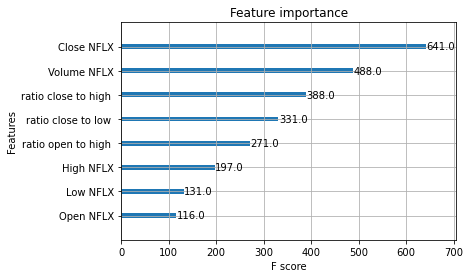

In [13]:
# updating training data with new features
x_train=df.iloc[:-1].copy().drop(columns=['target_close','Date'])
y_train=df['target_close'][:-1]

# retraining the model with new features 
reg.fit(x_train,y_train)

#ploting most effective features on the output
xgb.plot_importance(reg,max_num_features=100)

In [18]:
# stock price prediction 

# predicting 1 step ahead stock price
df_pred=df.iloc[-1:]
x_pred=df_pred.drop(columns=['target_close','Date'],axis=1)
y_pred=reg.predict(x_pred)




C:\Users\fardi\AppData\Local\Temp\ipykernel_12976\1047426405.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_pred=df_pred.drop(columns=['target_close','Date'],axis=1)


In [19]:
# Backtest

# Preparing backtest dataset
backtest_period=-5
y_test=df['target_close'][backtest_period:-1]

# Assesing and backtesting model performance
backtest_pred=[]

for i in range(backtest_period,-1,1):
    df_backtest_train=df.iloc[:-i]
    x_backtest_train=df_backtest_train.drop(columns=['target_close','Date'],axis=1)
    y_backtest_train=df_backtest_train['target_close']
    x_backtest_test=df.iloc[i:i+1].drop(columns=['target_close','Date'],axis=1)
    reg.fit(x_backtest_train,y_backtest_train)
    y_pred=reg.predict(x_backtest_test)
    backtest_pred.append(y_pred)

C:\Users\fardi\AppData\Local\Temp\ipykernel_12976\1589427501.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_backtest_train=df_backtest_train.drop(columns=['target_close','Date'],axis=1)
C:\Users\fardi\AppData\Local\Temp\ipykernel_12976\1589427501.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x_backtest_test=df.iloc[i:i+1].drop(columns=['target_close','Date'],axis=1)


In [20]:
print(f'Backtest Results for {ticker}')
print(f'MSE:{mean_squared_error(y_test,backtest_pred):.2f}')
print(f'MAE:{mean_absolute_error(y_test,backtest_pred):.2f}')
print(f'MAPE: {mean_absolute_percentage_error(y_test,backtest_pred):.2f}')

data={'Actual':y_test,'Predicted':backtest_pred}
df_backtest=pd.DataFrame(data)

print(df_backtest)

Backtest Results for NFLX
MSE:713785.66
MAE:844.23
MAPE: 0.70
          Actual    Predicted
130  1245.109985  [347.35986]
131  1209.239990  [365.89893]
132  1180.489990  [360.76895]
133  1158.599976   [342.4991]
